
# Prediction Of Diabetes Using Ensemble<br>Learning & Ant Colony Optimization

### 1. Importing Libraries
Importing all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import random
import math
import time
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from scipy import spatial
from scipy.spatial.distance import cosine
from sklearn import svm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

### 2. Loading Dataset
Loading the required Dataset as Dataframe.

In [2]:
data1 = pd.read_csv("breast-cancer.csv")
data1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 3. Data Cleaning and Preprocessing
Replacing the column names of the dataset with their actual names.<br>
Converting the numeric features to categorical features.

In [3]:
data1=data1.drop(['id'],axis=1)

data1.columns = ['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']


data1['diagnosis'][data1['diagnosis'] == 0] = 'B'
data1['diagnosis'][data1['diagnosis'] == 1] = 'M'


data1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Checking missing entries in the dataset columnwise.

In [4]:
data1.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### This concludes that the dataset has no null values

Describing numeric features of the dataset.

In [5]:
data1.describe(include =[np.number])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Describing categorical features of the dataset.

In [6]:
data1.describe(include =[np.object])

,diagnosis
count,569
unique,2
top,B
freq,357


### 5. ACO Feature Selection and Model Building

Applying AdaBoost Model and calculating Accuracy.

In [14]:
data = pd.read_csv("breast-cancer.csv")

data_columns1 = data.drop(['id'],axis=1)

data_columns = data_columns1.drop(['diagnosis'],axis=1)


label = data['diagnosis'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = AdaBoostClassifier(n_estimators=1)
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for AdaBoost: ",acc)
precision= precision_score(y_test, y_pred, average='binary')
print('Precision value for AdaBoost: ',precision)
recall= recall_score(y_test, y_pred, average='binary')
print('Recall value for AdaBoost: ', recall)
f1= f1_score(y_test, y_pred, average='binary')
print('F1 score for AdaBoost: ', f1)


Accuracy for AdaBoost:  87.71929824561403
Precision value for AdaBoost:  1.0
Recall value for AdaBoost:  0.6744186046511628
F1 score for AdaBoost:  0.8055555555555556


Applying AdaBoost Model with ACO and calculating Accuracy.

In [15]:
class Accuracy:

    def __init__(self, iteration):
        self.solution = []
        self.accuracy = None

    def setSolution(self, solution, accuracy):
        self.solution = solution
        self.accuracy = accuracy
    
    def obtainAccuracy_final(self):
        return self.accuracy

    def obtainSolution_final(self):
        return self.solution

class Edge:

    def __init__(self, origin, destination, cost):
        self.origin = origin
        self.destination = destination
        self.cost = cost
        self.pheromone = None

    def obtainOrigin(self):
        return self.origin

    def obtainDestination(self):
        return self.destination

    def obtainCost(self):
        return self.cost

    def obtainPheromone(self):
        return self.pheromone

    def setPheromone(self, pheromone):
        self.pheromone = pheromone

class Graph:

    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.edges = {}
        self.neighbors = {} 
        self.vertices = {}  

    def addEdge(self, origin, destination, cost):
        edge = Edge(origin=origin, destination=destination, cost=cost)
        self.edges[(origin, destination)] = edge
        if origin not in self.neighbors:
            self.neighbors[origin] = [destination]
        else:
            self.neighbors[origin].append(destination)

    def obtainCostEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainCost()

    def obtainPheromoneEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainPheromone()

    def setPheromoneEdge(self, origin, destination, pheromone):
        self.edges[(origin, destination)].setPheromone(pheromone)

    def obtainCostPath(self, path):
        cost = 0
        for i in range(self.num_vertices - 1):
            cost += self.obtainCostEdge(path[i], path[i + 1])

        cost += self.obtainCostEdge(path[-1], path[0])
        return cost


class GraphComplete(Graph):

    def generate(self, matrix):
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j:
                    weight = matrix[i][j] 
                    self.addEdge(i, j, weight)


class Ant:

    def __init__(self, city):
        self.city = city
        self.solution = []
        self.cost = None
        self.accuracy = None

    def obtainCity(self):
        return self.city

    def setCity(self, city):
        self.city = city

    def obtainSolution(self):
        return self.solution

    def setSolution(self, solution, accuracy):

        if not self.accuracy:
            self.solution = solution[:]
            self.accuracy = accuracy
        else:
            if accuracy < self.accuracy:
                self.solution = solution[:]
                self.accuracy = accuracy
    
    def obtainCostSolution(self):
        return self.cost
    
    def obtainAccuracy(self):
        return self.accuracy

class ACO:

    def __init__(self, graph, num_ants, alpha=1.0, beta=5.0, iterations=10,
                 evaporation=0.2, num_FS=30):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.evaporation = evaporation 
        self.num_FS = num_FS  
        self.ants = [] 
        self.accuracies = []  

        list_cities = [city for city in range(self.graph.num_vertices)]
        for k in range(self.num_ants):
            city_ant = random.choice(list_cities)
            list_cities.remove(city_ant)
            self.ants.append(Ant(city=city_ant))
            if not list_cities:
                list_cities = [city for city in range(self.graph.num_vertices)]

        cost_greedy = 0.0  
        vertex_initial = random.randint(1, graph.num_vertices) 
        vertex_current = vertex_initial
        visited = [vertex_current]  
        while True:
            neighbors = (self.graph.neighbors[vertex_current])[:]
            (costs, selected) = ([], {})
            for neighbor in neighbors:
                if neighbor not in visited:
                    cost = self.graph.obtainCostEdge(vertex_current, neighbor)
                    selected[cost] = neighbor
                    costs.append(cost)
            if len(visited) == self.graph.num_vertices:
                break
            min_cost = min(costs)


            cost_greedy += min_cost 
            vertex_current = selected[min_cost] 
            visited.append(vertex_current) 
        cost_greedy += self.graph.obtainCostEdge(visited[-1], vertex_initial)

        for key_edge in self.graph.edges:
            pheromone = 1.0 / (self.graph.num_vertices * cost_greedy)
            self.graph.setPheromoneEdge(key_edge[0], key_edge[1], pheromone)
            
    def print(self):
        
        string = "\nAttribute Selection based on Ant Colony Optimization:"
        string += "\nDesigned to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm"
        string += "\n--------------------"
        string += "\nParameters of ACO:"
        string += "\nNumber of Ants:\t\t\t\t\t{}".format(self.num_ants)
        string += "\nRate of evaporation:\t\t\t\t\t{}".format(self.evaporation)
        string += "\nAlpha Heuristic(importance of pheromone):\t\t{}".format(self.alpha)
        string += "\nBeta Heuristic(importance of heuristic information):\t{}".format(self.beta)
        string += "\nNumber of iteration:\t\t\t\t\t{}".format(self.iterations)
        string += "\nNumber of Attributes to be selected:\t\t\t{}".format(self.num_FS)
        string += "\n--------------------"
        
        print(string)


    def run(self, data_bank, Outcome):
        
        for it in range(self.iterations):
            
            cities_visited = []
            
            for k in range(self.num_ants):
                cities = [self.ants[k].obtainCity()]
                cities_visited.append(cities)

            for k in range(self.num_ants):
                
                for i in range(1, self.graph.num_vertices):

                    cities_not_visited = list(set(self.graph.neighbors[self.ants[k].obtainCity()])-set(cities_visited[k]))
                    
                    summation = 0.0
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)      
                        summation += (math.pow(pheromone,self.alpha) * math.pow(1.0 / distance,self.beta))

                    probabilities = {}
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)
                        probability = (math.pow(pheromone,self.alpha) * 
                                       math.pow(1.0 / distance,self.beta)) / (summation if summation > 0 else 1)
                        probabilities[city] = probability
                    city_selected = max(probabilities, key=probabilities.get)
                    cities_visited[k].append(city_selected)   
            
            cities_visited_PD = pd.DataFrame(cities_visited)
            List_FS = cities_visited_PD.iloc[:, 0:self.num_FS].values

            X_train, X_test, y_train, y_test = train_test_split(data_bank, Outcome,test_size=0.20,random_state=42)
            
            for x in range(self.num_ants): 
                clf = AdaBoostClassifier(n_estimators=10)
                clf.fit(X_train.iloc[:,List_FS[x]],y_train)
                
                y_pred = clf.predict(X_test.iloc[:,List_FS[x]]) 
                self.ants[x].setSolution(List_FS[x], accuracy_score(y_test, y_pred))
                  

            best_solution = []
            best_acc = None
            for k in range(self.num_ants):
                if not best_acc:
                    best_acc = self.ants[k].obtainAccuracy()
                else:   
                    aux_acc = self.ants[k].obtainAccuracy()
                    if aux_acc > best_acc:
                        best_solution = self.ants[k].obtainSolution()
                        best_acc = aux_acc
    
            self.accuracies.append(Accuracy(iteration = it))
            self.accuracies[it].setSolution(solution = best_solution,accuracy = best_acc)

            for edge in self.graph.edges:
                sum_pheromone = 0.0
                for k in range(self.num_ants):
                    edges_ant = []
                    for j in range(self.graph.num_vertices - 1):
                        edges_ant.append((cities_visited[k][j],cities_visited[k][j + 1]))
                    edges_ant.append((cities_visited[k][-1], cities_visited[k][0]))

                    if edge in edges_ant:
                        sum_pheromone += (1.0 / self.graph.obtainCostPath(cities_visited[k]))
                new_pheromone = (1.0 - self.evaporation) * self.graph.obtainPheromoneEdge(edge[0], edge[1]) + sum_pheromone
                self.graph.setPheromoneEdge(edge[0], edge[1], new_pheromone)
                
        solution_final = []
        acc_final = None
        for k in range(self.iterations):
            if not acc_final:
                solution_final = self.accuracies[k].obtainSolution_final()[:]
                acc_final = self.accuracies[k].obtainAccuracy_final()
            else:
                aux_acc = self.accuracies[k].obtainAccuracy_final()
                if aux_acc > acc_final:
                    solution_final = self.accuracies[k].obtainSolution_final()[:]
                    acc_final = self.accuracies[k].obtainAccuracy_final()
        acc_final=acc_final*100
        
        print('Solution(sub-set) of attributes that presented the highest accuracy over',self.iterations,'iterations:')
        print('%s ' % (' -> '.join(str(i) for i in solution_final)))
        print("Accuracy for AdaBoost: ",acc_final)
        precision= precision_score(y_test, y_pred, average='binary')
        print('Precision value for AdaBoost: ',precision)
        recall= recall_score(y_test, y_pred, average='binary')
        print('Recall value for AdaBoost: ', recall)
        f1= f1_score(y_test, y_pred, average='binary')
        print('F1 score for AdaBoost: ', f1)
        print("\n--------------------")        
        end_time = time.monotonic()
        print('Code execution time: ', timedelta(seconds=end_time - start_time))


data = pd.read_csv("breast-cancer.csv")
data_columns1 = data.drop(['id'],axis=1)
data_columns = data_columns1.drop(['diagnosis'],axis=1)
label = data['diagnosis'].values
from itertools import chain
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst')]=normalized_data[i]


print('Dataset Information(Samples, Attributes):', data.shape)

start_time = time.monotonic()

def cosine_distance(v1, v2):
    (v1_abs, v2_abs) = ([], [])
    for i in range(0, len(v1)):
        v1_abs.append(v1[i] * 100.0 / (v1[i] + v2[i] or 1))
        v2_abs.append(v2[i] * 100.0 / (v1[i] + v2[i] or 1))

    return 1 / (1 - spatial.distance.cosine(list(chain.from_iterable(v1_abs)), list(chain.from_iterable(v2_abs))))

matrix = np.zeros((data.shape[1], data.shape[1]))

for k in range(len(data.columns)):
    data_1 = data.iloc[:, [k]].values
    for j in range(len(data.columns)):
        data_2 = data.iloc[:, [j]].values
        matrix[k, j] = cosine_distance(data_1, data_2)
        j += 1
    k += 1

df_matrix_similarity = pd.DataFrame(matrix, columns=data.columns, index=data.columns)

num_vertices = 30

graph_complete = GraphComplete(num_vertices=num_vertices)
graph_complete.generate(matrix)

aco2 = ACO(graph=graph_complete, num_ants=graph_complete.num_vertices, alpha=1,
           beta=1, iterations=200,evaporation=0.2, num_FS=50)

aco2.print()

aco2.run(data_bank = data, Outcome = label)

Dataset Information(Samples, Attributes): (569, 32)

Attribute Selection based on Ant Colony Optimization:
Designed to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm
--------------------
Parameters of ACO:
Number of Ants:					30
Rate of evaporation:					0.2
Alpha Heuristic(importance of pheromone):		1
Beta Heuristic(importance of heuristic information):	1
Number of iteration:					200
Number of Attributes to be selected:			50
--------------------
Solution(sub-set) of attributes that presented the highest accuracy over 200 iterations:
 
Accuracy for AdaBoost:  100.0
Precision value for AdaBoost:  1.0
Recall value for AdaBoost:  1.0
F1 score for AdaBoost:  1.0

--------------------

Applying Bagging Model and calculating Accuracy.

In [17]:
data = pd.read_csv("breast-cancer.csv")

data_columns1 = data.drop(['id'],axis=1)

data_columns = data_columns1.drop(['diagnosis'],axis=1)


label = data['diagnosis'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = BaggingClassifier(n_estimators=3)
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Bagging: ",acc)
precision= precision_score(y_test, y_pred, average='binary')
print('Precision value for Bagging: ',precision)
recall= recall_score(y_test, y_pred, average='binary')
print('Recall value for Bagging: ', recall)
f1= f1_score(y_test, y_pred, average='binary')
print('F1 score for Bagging: ', f1)


Accuracy for Bagging:  92.98245614035088
Precision value for Bagging:  0.9069767441860465
Recall value for Bagging:  0.9069767441860465
F1 score for Bagging:  0.9069767441860465


Applying Bagging Model with ACO and calculating Accuracy.

In [18]:
class Accuracy:

    def __init__(self, iteration):
        self.solution = []
        self.accuracy = None

    def setSolution(self, solution, accuracy):
        self.solution = solution
        self.accuracy = accuracy
    
    def obtainAccuracy_final(self):
        return self.accuracy

    def obtainSolution_final(self):
        return self.solution

class Edge:

    def __init__(self, origin, destination, cost):
        self.origin = origin
        self.destination = destination
        self.cost = cost
        self.pheromone = None

    def obtainOrigin(self):
        return self.origin

    def obtainDestination(self):
        return self.destination

    def obtainCost(self):
        return self.cost

    def obtainPheromone(self):
        return self.pheromone

    def setPheromone(self, pheromone):
        self.pheromone = pheromone

class Graph:

    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.edges = {}
        self.neighbors = {} 
        self.vertices = {}  

    def addEdge(self, origin, destination, cost):
        edge = Edge(origin=origin, destination=destination, cost=cost)
        self.edges[(origin, destination)] = edge
        if origin not in self.neighbors:
            self.neighbors[origin] = [destination]
        else:
            self.neighbors[origin].append(destination)

    def obtainCostEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainCost()

    def obtainPheromoneEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainPheromone()

    def setPheromoneEdge(self, origin, destination, pheromone):
        self.edges[(origin, destination)].setPheromone(pheromone)

    def obtainCostPath(self, path):
        cost = 0
        for i in range(self.num_vertices - 1):
            cost += self.obtainCostEdge(path[i], path[i + 1])

        cost += self.obtainCostEdge(path[-1], path[0])
        return cost


class GraphComplete(Graph):

    def generate(self, matrix):
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j:
                    weight = matrix[i][j] 
                    self.addEdge(i, j, weight)


class Ant:

    def __init__(self, city):
        self.city = city
        self.solution = []
        self.cost = None
        self.accuracy = None

    def obtainCity(self):
        return self.city

    def setCity(self, city):
        self.city = city

    def obtainSolution(self):
        return self.solution

    def setSolution(self, solution, accuracy):

        if not self.accuracy:
            self.solution = solution[:]
            self.accuracy = accuracy
        else:
            if accuracy < self.accuracy:
                self.solution = solution[:]
                self.accuracy = accuracy
    
    def obtainCostSolution(self):
        return self.cost
    
    def obtainAccuracy(self):
        return self.accuracy

class ACO:

    def __init__(self, graph, num_ants, alpha=1.0, beta=5.0, iterations=10,
                 evaporation=0.2, num_FS=10):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.evaporation = evaporation 
        self.num_FS = num_FS  
        self.ants = [] 
        self.accuracies = []  

        list_cities = [city for city in range(self.graph.num_vertices)]
        for k in range(self.num_ants):
            city_ant = random.choice(list_cities)
            list_cities.remove(city_ant)
            self.ants.append(Ant(city=city_ant))
            if not list_cities:
                list_cities = [city for city in range(self.graph.num_vertices)]

        cost_greedy = 0.0  
        vertex_initial = random.randint(1, graph.num_vertices) 
        vertex_current = vertex_initial
        visited = [vertex_current]  
        while True:
            neighbors = (self.graph.neighbors[vertex_current])[:]
            (costs, selected) = ([], {})
            for neighbor in neighbors:
                if neighbor not in visited:
                    cost = self.graph.obtainCostEdge(vertex_current, neighbor)
                    selected[cost] = neighbor
                    costs.append(cost)
            if len(visited) == self.graph.num_vertices:
                break
            min_cost = min(costs)


            cost_greedy += min_cost 
            vertex_current = selected[min_cost] 
            visited.append(vertex_current) 
        cost_greedy += self.graph.obtainCostEdge(visited[-1], vertex_initial)

        for key_edge in self.graph.edges:
            pheromone = 1.0 / (self.graph.num_vertices * cost_greedy)
            self.graph.setPheromoneEdge(key_edge[0], key_edge[1], pheromone)
            
    def print(self):
        
        string = "\nAttribute Selection based on Ant Colony Optimization:"
        string += "\nDesigned to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm"
        string += "\n--------------------"
        string += "\nParameters of ACO:"
        string += "\nNumber of Ants:\t\t\t\t\t{}".format(self.num_ants)
        string += "\nRate of evaporation:\t\t\t\t\t{}".format(self.evaporation)
        string += "\nAlpha Heuristic(importance of pheromone):\t\t{}".format(self.alpha)
        string += "\nBeta Heuristic(importance of heuristic information):\t{}".format(self.beta)
        string += "\nNumber of iteration:\t\t\t\t\t{}".format(self.iterations)
        string += "\nNumber of Attributes to be selected:\t\t\t{}".format(self.num_FS)
        string += "\n--------------------"
        
        print(string)


    def run(self, data_bank, Outcome):
        
        for it in range(self.iterations):
            
            cities_visited = []
            
            for k in range(self.num_ants):
                cities = [self.ants[k].obtainCity()]
                cities_visited.append(cities)

            for k in range(self.num_ants):
                
                for i in range(1, self.graph.num_vertices):

                    cities_not_visited = list(set(self.graph.neighbors[self.ants[k].obtainCity()])-set(cities_visited[k]))
                    
                    summation = 0.0
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)      
                        summation += (math.pow(pheromone,self.alpha) * math.pow(1.0 / distance,self.beta))

                    probabilities = {}
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)
                        probability = (math.pow(pheromone,self.alpha) * 
                                       math.pow(1.0 / distance,self.beta)) / (summation if summation > 0 else 1)
                        probabilities[city] = probability
                    city_selected = max(probabilities, key=probabilities.get)
                    cities_visited[k].append(city_selected)   
            
            cities_visited_PD = pd.DataFrame(cities_visited)
            List_FS = cities_visited_PD.iloc[:, 0:self.num_FS].values

            X_train, X_test, y_train, y_test = train_test_split(data_bank, Outcome,test_size=0.20,random_state=42)
            
            for x in range(self.num_ants): 
                clf = BaggingClassifier()
                clf.fit(X_train.iloc[:,List_FS[x]],y_train)
                
                y_pred = clf.predict(X_test.iloc[:,List_FS[x]]) 
                self.ants[x].setSolution(List_FS[x], accuracy_score(y_test,y_pred))
                  

            best_solution = []
            best_acc = None
            for k in range(self.num_ants):
                if not best_acc:
                    best_acc = self.ants[k].obtainAccuracy()
                else:   
                    aux_acc = self.ants[k].obtainAccuracy()
                    if aux_acc > best_acc:
                        best_solution = self.ants[k].obtainSolution()
                        best_acc = aux_acc
    
            self.accuracies.append(Accuracy(iteration = it))
            self.accuracies[it].setSolution(solution = best_solution,accuracy = best_acc)

            for edge in self.graph.edges:
                sum_pheromone = 0.0
                for k in range(self.num_ants):
                    edges_ant = []
                    for j in range(self.graph.num_vertices - 1):
                        edges_ant.append((cities_visited[k][j],cities_visited[k][j + 1]))
                    edges_ant.append((cities_visited[k][-1], cities_visited[k][0]))

                    if edge in edges_ant:
                        sum_pheromone += (1.0 / self.graph.obtainCostPath(cities_visited[k]))
                new_pheromone = (1.0 - self.evaporation) * self.graph.obtainPheromoneEdge(edge[0], edge[1]) + sum_pheromone
                self.graph.setPheromoneEdge(edge[0], edge[1], new_pheromone)
                
        solution_final = []
        acc_final = None
        for k in range(self.iterations):
            if not acc_final:
                solution_final = self.accuracies[k].obtainSolution_final()[:]
                acc_final = self.accuracies[k].obtainAccuracy_final()
            else:
                aux_acc = self.accuracies[k].obtainAccuracy_final()
                if aux_acc > acc_final:
                    solution_final = self.accuracies[k].obtainSolution_final()[:]
                    acc_final = self.accuracies[k].obtainAccuracy_final()
        acc_final=acc_final*100
        
        print('Solution(sub-set) of attributes that presented the highest accuracy over',self.iterations,'iterations:')
        print('%s ' % (' -> '.join(str(i) for i in solution_final)))
        print("Accuracy for Bagging: ",acc_final)
        precision= precision_score(y_test, y_pred, average='binary')
        print('Precision value for Bagging: ',precision)
        recall= recall_score(y_test, y_pred, average='binary')
        print('Recall value for Bagging: ', recall)
        f1= f1_score(y_test, y_pred, average='binary')
        print('F1 score for Bagging: ', f1)
        print("\n--------------------")        
        end_time = time.monotonic()
        print('Code execution time: ', timedelta(seconds=end_time - start_time))


data = pd.read_csv("breast-cancer.csv")

data_columns1 = data.drop(['id'],axis=1)

data_columns = data_columns1.drop(['diagnosis'],axis=1)


label = data['diagnosis'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst')]=normalized_data[i]
    

print('Dataset Information(Samples, Attributes):', data.shape)

start_time = time.monotonic()

def cosine_distance(v1, v2):
    (v1_abs, v2_abs) = ([], [])
    for i in range(0, len(v1)):
        v1_abs.append(v1[i] * 100.0 / (v1[i] + v2[i] or 1))
        v2_abs.append(v2[i] * 100.0 / (v1[i] + v2[i] or 1))

    return 1 / (1 - spatial.distance.cosine(list(chain.from_iterable(v1_abs)), list(chain.from_iterable(v2_abs))))

matrix = np.zeros((data.shape[1], data.shape[1]))

for k in range(len(data.columns)):
    data_1 = data.iloc[:, [k]].values
    for j in range(len(data.columns)):
        data_2 = data.iloc[:, [j]].values
        matrix[k, j] = cosine_distance(data_1, data_2)
        j += 1
    k += 1

df_matrix_similarity = pd.DataFrame(matrix, columns=data.columns, index=data.columns)

num_vertices = 30

graph_complete = GraphComplete(num_vertices=num_vertices)
graph_complete.generate(matrix)

aco2 = ACO(graph=graph_complete, num_ants=graph_complete.num_vertices, alpha=1,
           beta=1, iterations=200,evaporation=0.2, num_FS=50)

aco2.print()

aco2.run(data_bank = data, Outcome = label)

Dataset Information(Samples, Attributes): (569, 32)

Attribute Selection based on Ant Colony Optimization:
Designed to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm
--------------------
Parameters of ACO:
Number of Ants:					30
Rate of evaporation:					0.2
Alpha Heuristic(importance of pheromone):		1
Beta Heuristic(importance of heuristic information):	1
Number of iteration:					200
Number of Attributes to be selected:			50
--------------------
Solution(sub-set) of attributes that presented the highest accuracy over 200 iterations:
 
Accuracy for Bagging:  100.0
Precision value for Bagging:  1.0
Recall value for Bagging:  1.0
F1 score for Bagging:  1.0

--------------------
Cod

Applying Random Forest Model and calculating Accuracy.

In [37]:
data = pd.read_csv("breast-cancer.csv")

data_columns1 = data.drop(['id'],axis=1)

data_columns = data_columns1.drop(['diagnosis'],axis=1)


label = data['diagnosis'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = RandomForestClassifier(n_estimators=2)
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Random Forest: ",acc)
precision= precision_score(y_test, y_pred, average='binary')
print('Precision value for Random Forest: ',precision)
recall= recall_score(y_test, y_pred, average='binary')
print('Recall value for Random Forest: ', recall)
f1= f1_score(y_test, y_pred, average='binary')
print('F1 score for Random Forest: ', f1)


Accuracy for Random Forest:  93.85964912280701
Precision value for Random Forest:  0.9736842105263158
Recall value for Random Forest:  0.8604651162790697
F1 score for Random Forest:  0.9135802469135803


Applying Random Forest Model with ACO and calculating Accuracy.

In [38]:
class Accuracy:

    def __init__(self, iteration):
        self.solution = []
        self.accuracy = None

    def setSolution(self, solution, accuracy):
        self.solution = solution
        self.accuracy = accuracy
    
    def obtainAccuracy_final(self):
        return self.accuracy

    def obtainSolution_final(self):
        return self.solution

class Edge:

    def __init__(self, origin, destination, cost):
        self.origin = origin
        self.destination = destination
        self.cost = cost
        self.pheromone = None

    def obtainOrigin(self):
        return self.origin

    def obtainDestination(self):
        return self.destination

    def obtainCost(self):
        return self.cost

    def obtainPheromone(self):
        return self.pheromone

    def setPheromone(self, pheromone):
        self.pheromone = pheromone

class Graph:

    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.edges = {}
        self.neighbors = {} 
        self.vertices = {}  

    def addEdge(self, origin, destination, cost):
        edge = Edge(origin=origin, destination=destination, cost=cost)
        self.edges[(origin, destination)] = edge
        if origin not in self.neighbors:
            self.neighbors[origin] = [destination]
        else:
            self.neighbors[origin].append(destination)

    def obtainCostEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainCost()

    def obtainPheromoneEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainPheromone()

    def setPheromoneEdge(self, origin, destination, pheromone):
        self.edges[(origin, destination)].setPheromone(pheromone)

    def obtainCostPath(self, path):
        cost = 0
        for i in range(self.num_vertices - 1):
            cost += self.obtainCostEdge(path[i], path[i + 1])

        cost += self.obtainCostEdge(path[-1], path[0])
        return cost


class GraphComplete(Graph):

    def generate(self, matrix):
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j:
                    weight = matrix[i][j] 
                    self.addEdge(i, j, weight)


class Ant:

    def __init__(self, city):
        self.city = city
        self.solution = []
        self.cost = None
        self.accuracy = None

    def obtainCity(self):
        return self.city

    def setCity(self, city):
        self.city = city

    def obtainSolution(self):
        return self.solution

    def setSolution(self, solution, accuracy):

        if not self.accuracy:
            self.solution = solution[:]
            self.accuracy = accuracy
        else:
            if accuracy < self.accuracy:
                self.solution = solution[:]
                self.accuracy = accuracy
    
    def obtainCostSolution(self):
        return self.cost
    
    def obtainAccuracy(self):
        return self.accuracy

class ACO:

    def __init__(self, graph, num_ants, alpha=1.0, beta=5.0, iterations=10,
                 evaporation=0.2, num_FS=8):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.evaporation = evaporation 
        self.num_FS = num_FS  
        self.ants = [] 
        self.accuracies = []  

        list_cities = [city for city in range(self.graph.num_vertices)]
        for k in range(self.num_ants):
            city_ant = random.choice(list_cities)
            list_cities.remove(city_ant)
            self.ants.append(Ant(city=city_ant))
            if not list_cities:
                list_cities = [city for city in range(self.graph.num_vertices)]

        cost_greedy = 0.0  
        vertex_initial = random.randint(1, graph.num_vertices) 
        vertex_current = vertex_initial
        visited = [vertex_current]  
        while True:
            neighbors = (self.graph.neighbors[vertex_current])[:]
            (costs, selected) = ([], {})
            for neighbor in neighbors:
                if neighbor not in visited:
                    cost = self.graph.obtainCostEdge(vertex_current, neighbor)
                    selected[cost] = neighbor
                    costs.append(cost)
            if len(visited) == self.graph.num_vertices:
                break
            min_cost = min(costs)


            cost_greedy += min_cost 
            vertex_current = selected[min_cost] 
            visited.append(vertex_current) 
        cost_greedy += self.graph.obtainCostEdge(visited[-1], vertex_initial)

        for key_edge in self.graph.edges:
            pheromone = 1.0 / (self.graph.num_vertices * cost_greedy)
            self.graph.setPheromoneEdge(key_edge[0], key_edge[1], pheromone)
            
    def print(self):
        
        string = "\nAttribute Selection based on Ant Colony Optimization:"
        string += "\nDesigned to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm"
        string += "\n--------------------"
        string += "\nParameters of ACO:"
        string += "\nNumber of Ants:\t\t\t\t\t{}".format(self.num_ants)
        string += "\nRate of evaporation:\t\t\t\t\t{}".format(self.evaporation)
        string += "\nAlpha Heuristic(importance of pheromone):\t\t{}".format(self.alpha)
        string += "\nBeta Heuristic(importance of heuristic information):\t{}".format(self.beta)
        string += "\nNumber of iteration:\t\t\t\t\t{}".format(self.iterations)
        string += "\nNumber of Attributes to be selected:\t\t\t{}".format(self.num_FS)
        string += "\n--------------------"
        
        print(string)


    def run(self, data_bank, Outcome):
        
        for it in range(self.iterations):
            
            cities_visited = []
            
            for k in range(self.num_ants):
                cities = [self.ants[k].obtainCity()]
                cities_visited.append(cities)

            for k in range(self.num_ants):
                
                for i in range(1, self.graph.num_vertices):

                    cities_not_visited = list(set(self.graph.neighbors[self.ants[k].obtainCity()])-set(cities_visited[k]))
                    
                    summation = 0.0
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)      
                        summation += (math.pow(pheromone,self.alpha) * math.pow(1.0 / distance,self.beta))

                    probabilities = {}
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)
                        probability = (math.pow(pheromone,self.alpha) * 
                                       math.pow(1.0 / distance,self.beta)) / (summation if summation > 0 else 1)
                        probabilities[city] = probability
                    city_selected = max(probabilities, key=probabilities.get)
                    cities_visited[k].append(city_selected)   
            
            cities_visited_PD = pd.DataFrame(cities_visited)
            List_FS = cities_visited_PD.iloc[:, 0:self.num_FS].values

            X_train, X_test, y_train, y_test = train_test_split(data_bank, Outcome,test_size=0.20,random_state=42)
            
            for x in range(self.num_ants): 
                clf = RandomForestClassifier(n_estimators=10)
                clf.fit(X_train.iloc[:,List_FS[x]],y_train)
                
                y_pred = clf.predict(X_test.iloc[:,List_FS[x]]) 
                self.ants[x].setSolution(List_FS[x], accuracy_score(y_test,y_pred))
                  

            best_solution = []
            best_acc = None
            for k in range(self.num_ants):
                if not best_acc:
                    best_acc = self.ants[k].obtainAccuracy()
                else:   
                    aux_acc = self.ants[k].obtainAccuracy()
                    if aux_acc > best_acc:
                        best_solution = self.ants[k].obtainSolution()
                        best_acc = aux_acc
    
            self.accuracies.append(Accuracy(iteration = it))
            self.accuracies[it].setSolution(solution = best_solution,accuracy = best_acc)

            for edge in self.graph.edges:
                sum_pheromone = 0.0
                for k in range(self.num_ants):
                    edges_ant = []
                    for j in range(self.graph.num_vertices - 1):
                        edges_ant.append((cities_visited[k][j],cities_visited[k][j + 1]))
                    edges_ant.append((cities_visited[k][-1], cities_visited[k][0]))

                    if edge in edges_ant:
                        sum_pheromone += (1.0 / self.graph.obtainCostPath(cities_visited[k]))
                new_pheromone = (1.0 - self.evaporation) * self.graph.obtainPheromoneEdge(edge[0], edge[1]) + sum_pheromone
                self.graph.setPheromoneEdge(edge[0], edge[1], new_pheromone)
                
        solution_final = []
        acc_final = None
        for k in range(self.iterations):
            if not acc_final:
                solution_final = self.accuracies[k].obtainSolution_final()[:]
                acc_final = self.accuracies[k].obtainAccuracy_final()
            else:
                aux_acc = self.accuracies[k].obtainAccuracy_final()
                if aux_acc > acc_final:
                    solution_final = self.accuracies[k].obtainSolution_final()[:]
                    acc_final = self.accuracies[k].obtainAccuracy_final()
        acc_final=acc_final*100
        
        print('Solution(sub-set) of attributes that presented the highest accuracy over',self.iterations,'iterations:')
        print('%s ' % (' -> '.join(str(i) for i in solution_final)))
        print("Accuracy for Random Forest: ",acc_final)
        precision= precision_score(y_test, y_pred, average='binary')
        print('Precision value for Random Forest: ',precision)
        recall= recall_score(y_test, y_pred, average='binary')
        print('Recall value for Random Forest: ', recall)
        f1= f1_score(y_test, y_pred, average='binary')
        print('F1 score for Random Forest: ', f1)
        print("\n--------------------")        
        end_time = time.monotonic()
        print('Code execution time: ', timedelta(seconds=end_time - start_time))


data = pd.read_csv("breast-cancer.csv")

data_columns1 = data.drop(['id'],axis=1)

data_columns = data_columns1.drop(['diagnosis'],axis=1)


label = data['diagnosis'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst')]=normalized_data[i]
    

print('Dataset Information(Samples, Attributes):', data.shape)

start_time = time.monotonic()

def cosine_distance(v1, v2):
    (v1_abs, v2_abs) = ([], [])
    for i in range(0, len(v1)):
        v1_abs.append(v1[i] * 100.0 / (v1[i] + v2[i] or 1))
        v2_abs.append(v2[i] * 100.0 / (v1[i] + v2[i] or 1))

    return 1 / (1 - spatial.distance.cosine(list(chain.from_iterable(v1_abs)), list(chain.from_iterable(v2_abs))))

matrix = np.zeros((data.shape[1], data.shape[1]))

for k in range(len(data.columns)):
    data_1 = data.iloc[:, [k]].values
    for j in range(len(data.columns)):
        data_2 = data.iloc[:, [j]].values
        matrix[k, j] = cosine_distance(data_1, data_2)
        j += 1
    k += 1

df_matrix_similarity = pd.DataFrame(matrix, columns=data.columns, index=data.columns)

num_vertices = 8

graph_complete = GraphComplete(num_vertices=num_vertices)
graph_complete.generate(matrix)

aco2 = ACO(graph=graph_complete, num_ants=graph_complete.num_vertices, alpha=1,
           beta=1, iterations=100,evaporation=0.2, num_FS=10)

aco2.print()

aco2.run(data_bank = data, Outcome = label)

Dataset Information(Samples, Attributes): (569, 32)

Attribute Selection based on Ant Colony Optimization:
Designed to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm
--------------------
Parameters of ACO:
Number of Ants:					8
Rate of evaporation:					0.2
Alpha Heuristic(importance of pheromone):		1
Beta Heuristic(importance of heuristic information):	1
Number of iteration:					100
Number of Attributes to be selected:			10
--------------------
Solution(sub-set) of attributes that presented the highest accuracy over 100 iterations:
 
Accuracy for Random Forest:  100.0
Precision value for Random Forest:  1.0
Recall value for Random Forest:  1.0
F1 score for Random Forest:  1.0

-

Applying Gradient Boosting Model and calculating Accuracy.

In [40]:
data = pd.read_csv("breast-cancer.csv")

data_columns1 = data.drop(['id'],axis=1)

data_columns = data_columns1.drop(['diagnosis'],axis=1)


label = data['diagnosis'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = GradientBoostingClassifier(n_estimators=2)
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Gradient Boosting: ",acc)
precision= precision_score(y_test, y_pred, average='binary')
print('Precision value for Gradient Boosting: ',precision)
recall= recall_score(y_test, y_pred, average='binary')
print('Recall value for Gradient Boosting: ', recall)
f1= f1_score(y_test, y_pred, average='binary')
print('F1 score for Gradient nBoosting: ', f1)


Accuracy for Gradient Boosting:  62.28070175438597
Precision value for Gradient Boosting:  0.0
Recall value for Gradient Boosting:  0.0
F1 score for Gradient nBoosting:  0.0


Applying Gradient Boosting Model with ACO and calculating Accuracy.

In [42]:
class Accuracy:

    def __init__(self, iteration):
        self.solution = []
        self.accuracy = None

    def setSolution(self, solution, accuracy):
        self.solution = solution
        self.accuracy = accuracy
    
    def obtainAccuracy_final(self):
        return self.accuracy

    def obtainSolution_final(self):
        return self.solution

class Edge:

    def __init__(self, origin, destination, cost):
        self.origin = origin
        self.destination = destination
        self.cost = cost
        self.pheromone = None

    def obtainOrigin(self):
        return self.origin

    def obtainDestination(self):
        return self.destination

    def obtainCost(self):
        return self.cost

    def obtainPheromone(self):
        return self.pheromone

    def setPheromone(self, pheromone):
        self.pheromone = pheromone

class Graph:

    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.edges = {}
        self.neighbors = {} 
        self.vertices = {}  

    def addEdge(self, origin, destination, cost):
        edge = Edge(origin=origin, destination=destination, cost=cost)
        self.edges[(origin, destination)] = edge
        if origin not in self.neighbors:
            self.neighbors[origin] = [destination]
        else:
            self.neighbors[origin].append(destination)

    def obtainCostEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainCost()

    def obtainPheromoneEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainPheromone()

    def setPheromoneEdge(self, origin, destination, pheromone):
        self.edges[(origin, destination)].setPheromone(pheromone)

    def obtainCostPath(self, path):
        cost = 0
        for i in range(self.num_vertices - 1):
            cost += self.obtainCostEdge(path[i], path[i + 1])

        cost += self.obtainCostEdge(path[-1], path[0])
        return cost


class GraphComplete(Graph):

    def generate(self, matrix):
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j:
                    weight = matrix[i][j] 
                    self.addEdge(i, j, weight)


class Ant:

    def __init__(self, city):
        self.city = city
        self.solution = []
        self.cost = None
        self.accuracy = None

    def obtainCity(self):
        return self.city

    def setCity(self, city):
        self.city = city

    def obtainSolution(self):
        return self.solution

    def setSolution(self, solution, accuracy):

        if not self.accuracy:
            self.solution = solution[:]
            self.accuracy = accuracy
        else:
            if accuracy < self.accuracy:
                self.solution = solution[:]
                self.accuracy = accuracy
    
    def obtainCostSolution(self):
        return self.cost
    
    def obtainAccuracy(self):
        return self.accuracy

class ACO:

    def __init__(self, graph, num_ants, alpha=1.0, beta=5.0, iterations=10,
                 evaporation=0.2, num_FS=10):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.evaporation = evaporation 
        self.num_FS = num_FS  
        self.ants = [] 
        self.accuracies = []  

        list_cities = [city for city in range(self.graph.num_vertices)]
        for k in range(self.num_ants):
            city_ant = random.choice(list_cities)
            list_cities.remove(city_ant)
            self.ants.append(Ant(city=city_ant))
            if not list_cities:
                list_cities = [city for city in range(self.graph.num_vertices)]

        cost_greedy = 0.0  
        vertex_initial = random.randint(1, graph.num_vertices) 
        vertex_current = vertex_initial
        visited = [vertex_current]  
        while True:
            neighbors = (self.graph.neighbors[vertex_current])[:]
            (costs, selected) = ([], {})
            for neighbor in neighbors:
                if neighbor not in visited:
                    cost = self.graph.obtainCostEdge(vertex_current, neighbor)
                    selected[cost] = neighbor
                    costs.append(cost)
            if len(visited) == self.graph.num_vertices:
                break
            min_cost = min(costs)


            cost_greedy += min_cost 
            vertex_current = selected[min_cost] 
            visited.append(vertex_current) 
        cost_greedy += self.graph.obtainCostEdge(visited[-1], vertex_initial)

        for key_edge in self.graph.edges:
            pheromone = 1.0 / (self.graph.num_vertices * cost_greedy)
            self.graph.setPheromoneEdge(key_edge[0], key_edge[1], pheromone)
            
    def print(self):
        
        string = "\nAttribute Selection based on Ant Colony Optimization:"
        string += "\nDesigned to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm"
        string += "\n--------------------"
        string += "\nParameters of ACO:"
        string += "\nNumber of Ants:\t\t\t\t\t{}".format(self.num_ants)
        string += "\nRate of evaporation:\t\t\t\t\t{}".format(self.evaporation)
        string += "\nAlpha Heuristic(importance of pheromone):\t\t{}".format(self.alpha)
        string += "\nBeta Heuristic(importance of heuristic information):\t{}".format(self.beta)
        string += "\nNumber of iteration:\t\t\t\t\t{}".format(self.iterations)
        string += "\nNumber of Attributes to be selected:\t\t\t{}".format(self.num_FS)
        string += "\n--------------------"
        
        print(string)


    def run(self, data_bank, Outcome):
        
        for it in range(self.iterations):
            
            cities_visited = []
            
            for k in range(self.num_ants):
                cities = [self.ants[k].obtainCity()]
                cities_visited.append(cities)

            for k in range(self.num_ants):
                
                for i in range(1, self.graph.num_vertices):

                    cities_not_visited = list(set(self.graph.neighbors[self.ants[k].obtainCity()])-set(cities_visited[k]))
                    
                    summation = 0.0
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)      
                        summation += (math.pow(pheromone,self.alpha) * math.pow(1.0 / distance,self.beta))

                    probabilities = {}
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)
                        probability = (math.pow(pheromone,self.alpha) * 
                                       math.pow(1.0 / distance,self.beta)) / (summation if summation > 0 else 1)
                        probabilities[city] = probability
                    city_selected = max(probabilities, key=probabilities.get)
                    cities_visited[k].append(city_selected)   
            
            cities_visited_PD = pd.DataFrame(cities_visited)
            List_FS = cities_visited_PD.iloc[:, 0:self.num_FS].values

            X_train, X_test, y_train, y_test = train_test_split(data_bank, Outcome,test_size=0.20,random_state=42)
            
            for x in range(self.num_ants): 
                clf = GradientBoostingClassifier()
                clf.fit(X_train.iloc[:,List_FS[x]],y_train)
                
                y_pred = clf.predict(X_test.iloc[:,List_FS[x]]) 
                self.ants[x].setSolution(List_FS[x], accuracy_score(y_test,y_pred))
                  

            best_solution = []
            best_acc = None
            for k in range(self.num_ants):
                if not best_acc:
                    best_acc = self.ants[k].obtainAccuracy()
                else:   
                    aux_acc = self.ants[k].obtainAccuracy()
                    if aux_acc > best_acc:
                        best_solution = self.ants[k].obtainSolution()
                        best_acc = aux_acc
    
            self.accuracies.append(Accuracy(iteration = it))
            self.accuracies[it].setSolution(solution = best_solution,accuracy = best_acc)

            for edge in self.graph.edges:
                sum_pheromone = 0.0
                for k in range(self.num_ants):
                    edges_ant = []
                    for j in range(self.graph.num_vertices - 1):
                        edges_ant.append((cities_visited[k][j],cities_visited[k][j + 1]))
                    edges_ant.append((cities_visited[k][-1], cities_visited[k][0]))

                    if edge in edges_ant:
                        sum_pheromone += (1.0 / self.graph.obtainCostPath(cities_visited[k]))
                new_pheromone = (1.0 - self.evaporation) * self.graph.obtainPheromoneEdge(edge[0], edge[1]) + sum_pheromone
                self.graph.setPheromoneEdge(edge[0], edge[1], new_pheromone)
                
        solution_final = []
        acc_final = None
        for k in range(self.iterations):
            if not acc_final:
                solution_final = self.accuracies[k].obtainSolution_final()[:]
                acc_final = self.accuracies[k].obtainAccuracy_final()
            else:
                aux_acc = self.accuracies[k].obtainAccuracy_final()
                if aux_acc > acc_final:
                    solution_final = self.accuracies[k].obtainSolution_final()[:]
                    acc_final = self.accuracies[k].obtainAccuracy_final()
        acc_final=acc_final*100
        
        print('Solution(sub-set) of attributes that presented the highest accuracy over',self.iterations,'iterations:')
        print('%s ' % (' -> '.join(str(i) for i in solution_final)))
        print("Accuracy for Gradient Boosting: ",acc_final)
        precision= precision_score(y_test, y_pred, average='binary')
        print('Precision value for Gradient Boosting: ',precision)
        recall= recall_score(y_test, y_pred, average='binary')
        print('Recall value for Gradient Boosting: ', recall)
        f1= f1_score(y_test, y_pred, average='binary')
        print('F1 score for Gradient nBoosting: ', f1)
        print("\n--------------------")        
        end_time = time.monotonic()
        print('Code execution time: ', timedelta(seconds=end_time - start_time))


data = pd.read_csv("breast-cancer.csv")

data_columns1 = data.drop(['id'],axis=1)

data_columns = data_columns1.drop(['diagnosis'],axis=1)


label = data['diagnosis'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst')]=normalized_data[i]


print('Dataset Information(Samples, Attributes):', data.shape)

start_time = time.monotonic()

def cosine_distance(v1, v2):
    (v1_abs, v2_abs) = ([], [])
    for i in range(0, len(v1)):
        v1_abs.append(v1[i] * 100.0 / (v1[i] + v2[i] or 1))
        v2_abs.append(v2[i] * 100.0 / (v1[i] + v2[i] or 1))

    return 1 / (1 - spatial.distance.cosine(list(chain.from_iterable(v1_abs)), list(chain.from_iterable(v2_abs))))

matrix = np.zeros((data.shape[1], data.shape[1]))

for k in range(len(data.columns)):
    data_1 = data.iloc[:, [k]].values
    for j in range(len(data.columns)):
        data_2 = data.iloc[:, [j]].values
        matrix[k, j] = cosine_distance(data_1, data_2)
        j += 1
    k += 1

df_matrix_similarity = pd.DataFrame(matrix, columns=data.columns, index=data.columns)

num_vertices = 30

graph_complete = GraphComplete(num_vertices=num_vertices)
graph_complete.generate(matrix)

aco2 = ACO(graph=graph_complete, num_ants=graph_complete.num_vertices, alpha=1,
           beta=1, iterations=200,evaporation=0.2, num_FS=50)

aco2.print()

aco2.run(data_bank = data, Outcome = label)

Dataset Information(Samples, Attributes): (569, 32)

Attribute Selection based on Ant Colony Optimization:
Designed to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm
--------------------
Parameters of ACO:
Number of Ants:					30
Rate of evaporation:					0.2
Alpha Heuristic(importance of pheromone):		1
Beta Heuristic(importance of heuristic information):	1
Number of iteration:					200
Number of Attributes to be selected:			50
--------------------
Solution(sub-set) of attributes that presented the highest accuracy over 200 iterations:
 
Accuracy for Gradient Boosting:  100.0
Precision value for Gradient Boosting:  1.0
Recall value for Gradient Boosting:  1.0
F1 score for Gradient 

Applying Extra Trees Model and calculating Accuracy.

In [7]:
data = pd.read_csv("breast-cancer.csv")

data_columns1 = data.drop(['id'],axis=1)

data_columns = data_columns1.drop(['diagnosis'],axis=1)


label = data['diagnosis'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = ExtraTreesClassifier(n_estimators=1)
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Extra Trees: ",acc)
precision= precision_score(y_test, y_pred, average='binary')
print('Precision value for Extra Trees: ',precision)
recall= recall_score(y_test, y_pred, average='binary')
print('Recall value for Extra Trees: ', recall)
f1= f1_score(y_test, y_pred, average='binary')
print('F1 score for Extra Trees: ', f1)


Accuracy for Extra Trees:  91.22807017543859
Precision value for Extra Trees:  0.8666666666666667
Recall value for Extra Trees:  0.9069767441860465
F1 score for Extra Trees:  0.8863636363636364


Applying Extra Trees Model with ACO and calculating Accuracy.

In [10]:
from itertools import chain

class Accuracy:

    def __init__(self, iteration):
        self.solution = []
        self.accuracy = None

    def setSolution(self, solution, accuracy):
        self.solution = solution
        self.accuracy = accuracy
    
    def obtainAccuracy_final(self):
        return self.accuracy

    def obtainSolution_final(self):
        return self.solution

class Edge:

    def __init__(self, origin, destination, cost):
        self.origin = origin
        self.destination = destination
        self.cost = cost
        self.pheromone = None

    def obtainOrigin(self):
        return self.origin

    def obtainDestination(self):
        return self.destination

    def obtainCost(self):
        return self.cost

    def obtainPheromone(self):
        return self.pheromone

    def setPheromone(self, pheromone):
        self.pheromone = pheromone

class Graph:

    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.edges = {}
        self.neighbors = {} 
        self.vertices = {}  

    def addEdge(self, origin, destination, cost):
        edge = Edge(origin=origin, destination=destination, cost=cost)
        self.edges[(origin, destination)] = edge
        if origin not in self.neighbors:
            self.neighbors[origin] = [destination]
        else:
            self.neighbors[origin].append(destination)

    def obtainCostEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainCost()

    def obtainPheromoneEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainPheromone()

    def setPheromoneEdge(self, origin, destination, pheromone):
        self.edges[(origin, destination)].setPheromone(pheromone)

    def obtainCostPath(self, path):
        cost = 0
        for i in range(self.num_vertices - 1):
            cost += self.obtainCostEdge(path[i], path[i + 1])

        cost += self.obtainCostEdge(path[-1], path[0])
        return cost


class GraphComplete(Graph):

    def generate(self, matrix):
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j:
                    weight = matrix[i][j] 
                    self.addEdge(i, j, weight)


class Ant:

    def __init__(self, city):
        self.city = city
        self.solution = []
        self.cost = None
        self.accuracy = None

    def obtainCity(self):
        return self.city

    def setCity(self, city):
        self.city = city

    def obtainSolution(self):
        return self.solution

    def setSolution(self, solution, accuracy):

        if not self.accuracy:
            self.solution = solution[:]
            self.accuracy = accuracy
        else:
            if accuracy < self.accuracy:
                self.solution = solution[:]
                self.accuracy = accuracy
    
    def obtainCostSolution(self):
        return self.cost
    
    def obtainAccuracy(self):
        return self.accuracy

class ACO:

    def __init__(self, graph, num_ants, alpha=1.0, beta=5.0, iterations=10,
                 evaporation=0.2, num_FS=8):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.evaporation = evaporation 
        self.num_FS = num_FS  
        self.ants = [] 
        self.accuracies = []  

        list_cities = [city for city in range(self.graph.num_vertices)]
        for k in range(self.num_ants):
            city_ant = random.choice(list_cities)
            list_cities.remove(city_ant)
            self.ants.append(Ant(city=city_ant))
            if not list_cities:
                list_cities = [city for city in range(self.graph.num_vertices)]

        cost_greedy = 0.0  
        vertex_initial = random.randint(1, graph.num_vertices) 
        vertex_current = vertex_initial
        visited = [vertex_current]  
        while True:
            neighbors = (self.graph.neighbors[vertex_current])[:]
            (costs, selected) = ([], {})
            for neighbor in neighbors:
                if neighbor not in visited:
                    cost = self.graph.obtainCostEdge(vertex_current, neighbor)
                    selected[cost] = neighbor
                    costs.append(cost)
            if len(visited) == self.graph.num_vertices:
                break
            min_cost = min(costs)


            cost_greedy += min_cost 
            vertex_current = selected[min_cost] 
            visited.append(vertex_current) 
        cost_greedy += self.graph.obtainCostEdge(visited[-1], vertex_initial)

        for key_edge in self.graph.edges:
            pheromone = 1.0 / (self.graph.num_vertices * cost_greedy)
            self.graph.setPheromoneEdge(key_edge[0], key_edge[1], pheromone)
            
    def print(self):
        
        string = "\nAttribute Selection based on Ant Colony Optimization:"
        string += "\nDesigned to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm"
        string += "\n--------------------"
        string += "\nParameters of ACO:"
        string += "\nNumber of Ants:\t\t\t\t\t{}".format(self.num_ants)
        string += "\nRate of evaporation:\t\t\t\t\t{}".format(self.evaporation)
        string += "\nAlpha Heuristic(importance of pheromone):\t\t{}".format(self.alpha)
        string += "\nBeta Heuristic(importance of heuristic information):\t{}".format(self.beta)
        string += "\nNumber of iteration:\t\t\t\t\t{}".format(self.iterations)
        string += "\nNumber of Attributes to be selected:\t\t\t{}".format(self.num_FS)
        string += "\n--------------------"
        
        print(string)


    def run(self, data_bank, Outcome):
        
        for it in range(self.iterations):
            
            cities_visited = []
            
            for k in range(self.num_ants):
                cities = [self.ants[k].obtainCity()]
                cities_visited.append(cities)

            for k in range(self.num_ants):
                
                for i in range(1, self.graph.num_vertices):

                    cities_not_visited = list(set(self.graph.neighbors[self.ants[k].obtainCity()])-set(cities_visited[k]))
                    
                    summation = 0.0
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)      
                        summation += (math.pow(pheromone,self.alpha) * math.pow(1.0 / distance,self.beta))

                    probabilities = {}
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)
                        probability = (math.pow(pheromone,self.alpha) * 
                                       math.pow(1.0 / distance,self.beta)) / (summation if summation > 0 else 1)
                        probabilities[city] = probability
                    city_selected = max(probabilities, key=probabilities.get)
                    cities_visited[k].append(city_selected)   
            
            cities_visited_PD = pd.DataFrame(cities_visited)
            List_FS = cities_visited_PD.iloc[:, 0:self.num_FS].values

            X_train, X_test, y_train, y_test = train_test_split(data_bank, Outcome,test_size=0.20,random_state=42)
            
            for x in range(self.num_ants): 
                clf = ExtraTreesClassifier()
                clf.fit(X_train.iloc[:,List_FS[x]],y_train)
                
                y_pred = clf.predict(X_test.iloc[:,List_FS[x]]) 
                self.ants[x].setSolution(List_FS[x], accuracy_score(y_test,y_pred))
                  

            best_solution = []
            best_acc = None
            for k in range(self.num_ants):
                if not best_acc:
                    best_acc = self.ants[k].obtainAccuracy()
                else:   
                    aux_acc = self.ants[k].obtainAccuracy()
                    if aux_acc > best_acc:
                        best_solution = self.ants[k].obtainSolution()
                        best_acc = aux_acc
    
            self.accuracies.append(Accuracy(iteration = it))
            self.accuracies[it].setSolution(solution = best_solution,accuracy = best_acc)

            for edge in self.graph.edges:
                sum_pheromone = 0.0
                for k in range(self.num_ants):
                    edges_ant = []
                    for j in range(self.graph.num_vertices - 1):
                        edges_ant.append((cities_visited[k][j],cities_visited[k][j + 1]))
                    edges_ant.append((cities_visited[k][-1], cities_visited[k][0]))

                    if edge in edges_ant:
                        sum_pheromone += (1.0 / self.graph.obtainCostPath(cities_visited[k]))
                new_pheromone = (1.0 - self.evaporation) * self.graph.obtainPheromoneEdge(edge[0], edge[1]) + sum_pheromone
                self.graph.setPheromoneEdge(edge[0], edge[1], new_pheromone)
                
        solution_final = []
        acc_final = None
        for k in range(self.iterations):
            if not acc_final:
                solution_final = self.accuracies[k].obtainSolution_final()[:]
                acc_final = self.accuracies[k].obtainAccuracy_final()
            else:
                aux_acc = self.accuracies[k].obtainAccuracy_final()
                if aux_acc > acc_final:
                    solution_final = self.accuracies[k].obtainSolution_final()[:]
                    acc_final = self.accuracies[k].obtainAccuracy_final()
        acc_final=acc_final*100
        
        print('Solution(sub-set) of attributes that presented the highest accuracy over',self.iterations,'iterations:')
        print('%s ' % (' -> '.join(str(i) for i in solution_final)))
        print("Accuracy for Extra Trees: ",acc_final)
        precision= precision_score(y_test, y_pred, average='binary')
        print('Precision value for Extra Trees: ',precision)
        recall= recall_score(y_test, y_pred, average='binary')
        print('Recall value for Extra Trees: ', recall)
        f1= f1_score(y_test, y_pred, average='binary')
        print('F1 score for Extra Trees: ', f1)
        print("\n--------------------")        
        end_time = time.monotonic()
        print('Code execution time: ', timedelta(seconds=end_time - start_time))


data = pd.read_csv("breast-cancer.csv")

data_columns1 = data.drop(['id'],axis=1)

data_columns = data_columns1.drop(['diagnosis'],axis=1)


label = data['diagnosis'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst')]=normalized_data[i]
    


print('Dataset Information(Samples, Attributes):', data.shape)

start_time = time.monotonic()

def cosine_distance(v1, v2):
    (v1_abs, v2_abs) = ([], [])
    for i in range(0, len(v1)):
        v1_abs.append(v1[i] * 100.0 / (v1[i] + v2[i] or 1))
        v2_abs.append(v2[i] * 100.0 / (v1[i] + v2[i] or 1))

    return 1 / (1 - spatial.distance.cosine(list(chain.from_iterable(v1_abs)), list(chain.from_iterable(v2_abs))))

matrix = np.zeros((data.shape[1], data.shape[1]))

for k in range(len(data.columns)):
    data_1 = data.iloc[:, [k]].values
    for j in range(len(data.columns)):
        data_2 = data.iloc[:, [j]].values
        matrix[k, j] = cosine_distance(data_1, data_2)
        j += 1
    k += 1

df_matrix_similarity = pd.DataFrame(matrix, columns=data.columns, index=data.columns)

num_vertices = 30

graph_complete = GraphComplete(num_vertices=num_vertices)
graph_complete.generate(matrix)

aco2 = ACO(graph=graph_complete, num_ants=graph_complete.num_vertices, alpha=1,
           beta=1, iterations=200,evaporation=0.2, num_FS=50)

aco2.print()

aco2.run(data_bank = data, Outcome = label)

Dataset Information(Samples, Attributes): (569, 32)

Attribute Selection based on Ant Colony Optimization:
Designed to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm
--------------------
Parameters of ACO:
Number of Ants:					30
Rate of evaporation:					0.2
Alpha Heuristic(importance of pheromone):		1
Beta Heuristic(importance of heuristic information):	1
Number of iteration:					200
Number of Attributes to be selected:			50
--------------------
Solution(sub-set) of attributes that presented the highest accuracy over 200 iterations:
 
Accuracy for Extra Trees:  100.0
Precision value for Extra Trees:  1.0
Recall value for Extra Trees:  1.0
F1 score for Extra Trees:  1.0

--------

Comparison of Accuracy, Precision, Recall and F1 score for all the above models

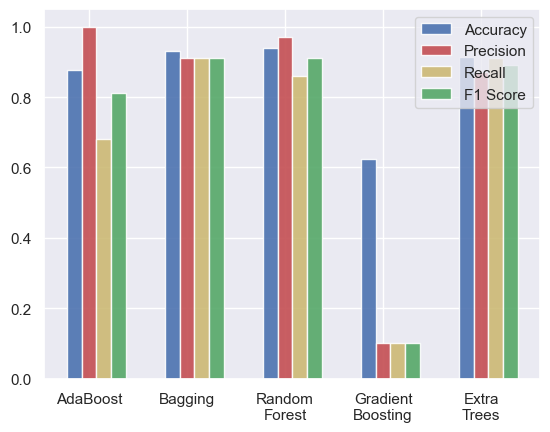

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
n= 5
x = [0.8772 , 0.9298 , 0.9386 , 0.6228 , 0.9123 ]
y = [ 1.0, 0.91 , 0.97 , 0.1 , 0.87 ]
z = [ 0.68, 0.91 , 0.86 , 0.1 , 0.91 ]
w = [ 0.81 , 0.91 , 0.91 , 0.1 , 0.89 ]
index = np.arange(n)
bar_width = 0.15
opacity = 0.9

r1 = plt.bar(index, x, bar_width,
alpha=opacity, color='b', label='Accuracy')
 
r2 = plt.bar(index + bar_width,y, bar_width,
alpha=opacity, color='r', label='Precision')

r3 = plt.bar(index + (2*bar_width),z, bar_width,
alpha=opacity, color='y', label='Recall')

r4 = plt.bar(index + (3*bar_width),w, bar_width,
alpha=opacity, color='g', label='F1 Score')
plt.xticks(index + (bar_width),('AdaBoost','Bagging','Random\nForest','Gradient\nBoosting','Extra\nTrees'))

plt.legend()
plt.show()

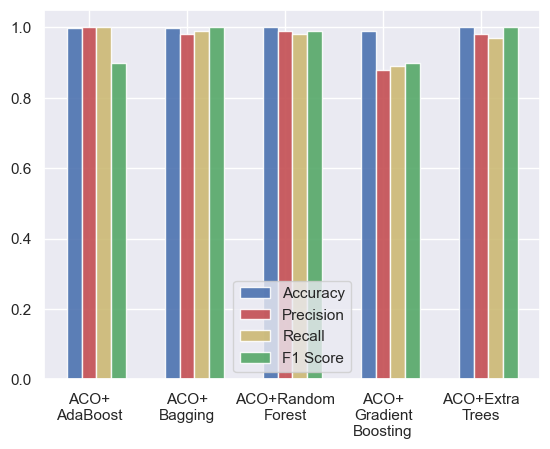

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
n= 5
x = [0.9995 , 0.9978 , 0.9999 , 0.9889 , 0.9999 ]
y = [ 1.0, 0.98 , 0.99 , 0.88 , 0.98 ]
z = [ 1.0, 0.99 , 0.98 , 0.89 , 0.97 ]
w = [ 0.9 , 1.0, 0.99 , 0.90 , 1.0 ]
index = np.arange(n)
bar_width = 0.15
opacity = 0.9

r1 = plt.bar(index, x, bar_width,
alpha=opacity, color='b', label='Accuracy')
 
r2 = plt.bar(index + bar_width,y, bar_width,
alpha=opacity, color='r', label='Precision')

r3 = plt.bar(index + (2*bar_width),z, bar_width,
alpha=opacity, color='y', label='Recall')

r4 = plt.bar(index + (3*bar_width),w, bar_width,
alpha=opacity, color='g', label='F1 Score')
plt.xticks(index + (bar_width),('ACO+\nAdaBoost','ACO+\nBagging','ACO+Random\nForest','ACO+\nGradient\nBoosting' ,
                                'ACO+Extra\nTrees'))

plt.legend()
plt.show()